In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# 1. Define the Grid
x = np.linspace(-1.2, 1.2, 500)
y = np.linspace(-1.2, 1.2, 500)
X, Y = np.meshgrid(x, y)

In [3]:
# 2. Define the Geometry (Same math as the simulation)
# The "Bent" coordinate system to make it bean-shaped
Y_bent = Y - 0.2 * np.sin(3 * X)

# The Outer Boundary (Cortex)
# Ellipse equation: (x/a)^2 + (y/b)^2 <= 1
is_kidney = ((X / 0.8)**2 + (Y_bent / 0.5)**2) <= 1.0

# The Inner Core (Medulla)
# Defined by radial distance from center
R = np.sqrt(X**2 + Y**2)
is_medulla = is_kidney & (R < 0.4) 

In [4]:
# 3. Create a Visualization Map
# 0 = Void (Outside), 1 = Cortex, 2 = Medulla
domain_map = np.zeros_like(X, dtype=float)
domain_map[~is_kidney] = np.nan   # Make outside transparent
domain_map[is_kidney] = 0.5       # Cortex value
domain_map[is_medulla] = 1.0      # Medulla value

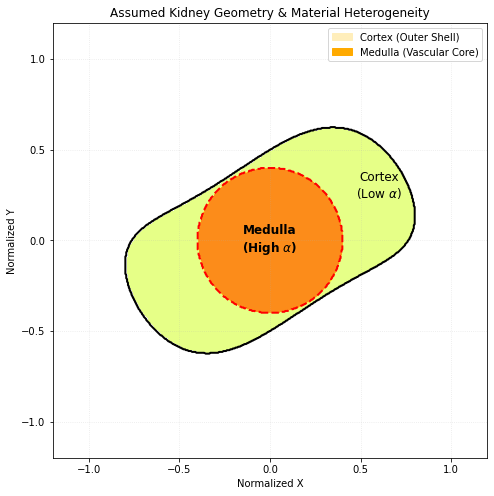

In [5]:
# 4. Plot
plt.figure(figsize=(10, 8))
plt.imshow(domain_map, extent=[-1.2, 1.2, -1.2, 1.2], origin='lower', 
           cmap='Wistia', alpha=0.9)

# Add Contours for sharpness
plt.contour(X, Y, is_kidney, levels=[0.5], colors='black', linewidths=2)
plt.contour(X, Y, is_medulla, levels=[0.5], colors='red', linewidths=2, linestyles='--')

# Annotations
plt.text(0.0, 0.0, "Medulla\n(High $\\alpha$)", ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(0.6, 0.3, "Cortex\n(Low $\\alpha$)", ha='center', va='center', fontsize=12)

# Legend
cortex_patch = mpatches.Patch(color='#ffeebb', label='Cortex (Outer Shell)')
medulla_patch = mpatches.Patch(color='#ffaa00', label='Medulla (Vascular Core)')
plt.legend(handles=[cortex_patch, medulla_patch], loc='upper right')

plt.title("Assumed Kidney Geometry & Material Heterogeneity")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.grid(True, alpha=0.3, linestyle=':')

plt.savefig("kidney_geometry_check.png", dpi=300)
plt.show()